## Lets make an AQI prediction Model 

In [1]:
# Load the Dataset

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns


data1 = pd.read_csv(r"D:\AQI prediction model\city_day.csv")

In [2]:
df = data1.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [4]:
df.shape

(29531, 16)

In [5]:
df.describe()


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [6]:
df.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [7]:
df.columns = df.columns.str.upper()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CITY        29531 non-null  object 
 1   DATE        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOX         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  BENZENE     23908 non-null  float64
 12  TOLUENE     21490 non-null  float64
 13  XYLENE      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_BUCKET  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [8]:
df.DATE = pd.to_datetime(df.DATE)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   CITY        29531 non-null  object        
 1   DATE        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOX         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  BENZENE     23908 non-null  float64       
 12  TOLUENE     21490 non-null  float64       
 13  XYLENE      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_BUCKET  24850 non-null  object        
dtypes: datetime64[ns](1), 

In [9]:
data2 = df.copy()
df1 = data2.copy()

In [10]:
df1.isna().sum() 
df1.fillna(df1.mean(numeric_only=True), inplace=True)
df1.isna().sum()
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   CITY        29531 non-null  object        
 1   DATE        29531 non-null  datetime64[ns]
 2   PM2.5       29531 non-null  float64       
 3   PM10        29531 non-null  float64       
 4   NO          29531 non-null  float64       
 5   NO2         29531 non-null  float64       
 6   NOX         29531 non-null  float64       
 7   NH3         29531 non-null  float64       
 8   CO          29531 non-null  float64       
 9   SO2         29531 non-null  float64       
 10  O3          29531 non-null  float64       
 11  BENZENE     29531 non-null  float64       
 12  TOLUENE     29531 non-null  float64       
 13  XYLENE      29531 non-null  float64       
 14  AQI         29531 non-null  float64       
 15  AQI_BUCKET  24850 non-null  object        
dtypes: datetime64[ns](1), 

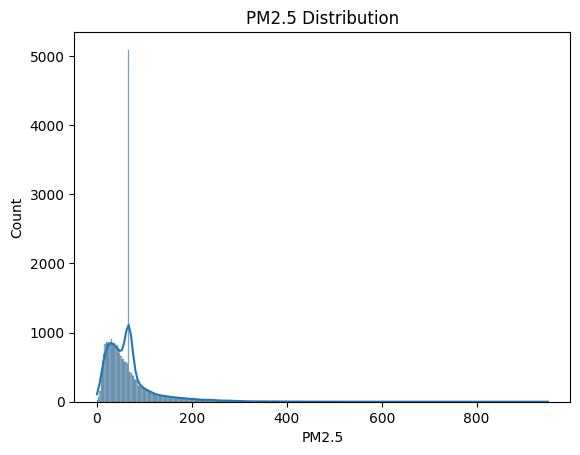

In [11]:
sns.histplot(df1['PM2.5'], kde=True)
plt.title("PM2.5 Distribution")
plt.show()


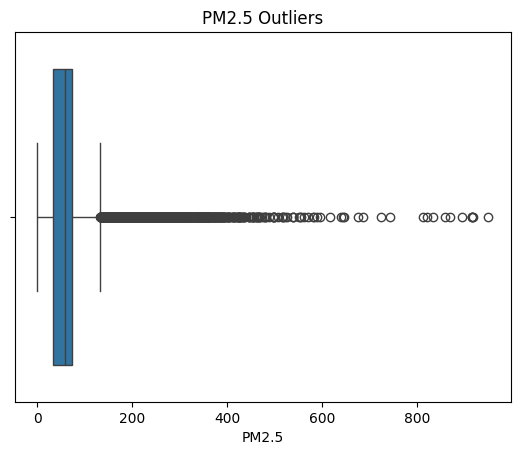

In [12]:
sns.boxplot(x=df1['PM2.5'])
plt.title("PM2.5 Outliers")
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   CITY        29531 non-null  object        
 1   DATE        29531 non-null  datetime64[ns]
 2   PM2.5       29531 non-null  float64       
 3   PM10        29531 non-null  float64       
 4   NO          29531 non-null  float64       
 5   NO2         29531 non-null  float64       
 6   NOX         29531 non-null  float64       
 7   NH3         29531 non-null  float64       
 8   CO          29531 non-null  float64       
 9   SO2         29531 non-null  float64       
 10  O3          29531 non-null  float64       
 11  BENZENE     29531 non-null  float64       
 12  TOLUENE     29531 non-null  float64       
 13  XYLENE      29531 non-null  float64       
 14  AQI         29531 non-null  float64       
 15  AQI_BUCKET  24850 non-null  object        
dtypes: datetime64[ns](1), 

Text(0.5, 1.0, 'PM2.5 Outliers')

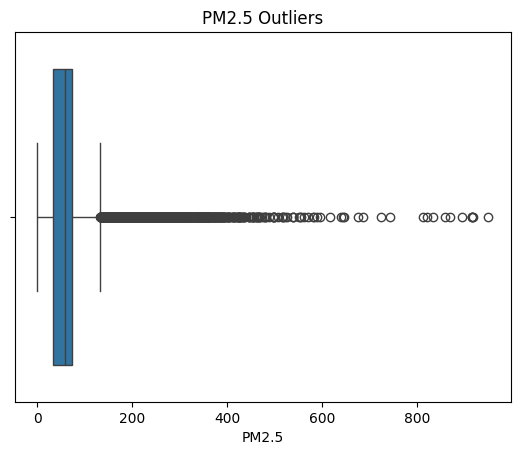

In [ ]:
df1.info()

sns.boxplot(x=df1['PM2.5'])
plt.title("PM2.5 Outliers")




In [13]:
df1['AQI_BUCKET'] = None


In [14]:
import numpy as np
import pandas as pd

bins = [0, 50, 100, 200, 300, 400, 500, np.inf]
labels = [
    'Good',
    'Satisfactory',
    'Moderate',
    'Poor',
    'Very Poor',
    'Severe',
    'Extreme'
]

df1['AQI_BUCKET'] = pd.cut(
    df1['AQI'],
    bins=bins,
    labels=labels,
    include_lowest=True
)



In [ ]:
# Values where AQI id extreme



,CITY,DATE,PM2.5,PM10,NO,NO2,NOX,NH3,CO,SO2,O3,BENZENE,TOLUENE,XYLENE,AQI,AQI_BUCKET
30,Ahmedabad,2015-01-31,94.52,118.127103,24.39,32.660000,52.61,23.483476,24.39,67.39,111.33,0.24000,0.010000,7.670000,514.0,Extreme
31,Ahmedabad,2015-02-01,135.99,118.127103,43.48,42.080000,84.57,23.483476,43.48,75.23,102.70,0.40000,0.040000,25.870000,782.0,Extreme
32,Ahmedabad,2015-02-02,178.33,118.127103,54.56,35.310000,72.80,23.483476,54.56,55.04,107.38,0.46000,0.060000,35.610000,914.0,Extreme
33,Ahmedabad,2015-02-03,139.70,118.127103,30.61,28.400000,56.73,23.483476,30.61,33.79,73.60,0.17000,0.030000,11.870000,660.0,Extreme
43,Ahmedabad,2015-02-13,103.36,118.127103,18.18,39.560000,57.33,23.483476,18.18,80.43,40.11,11.29000,24.350000,3.350000,510.0,Extreme
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25195,Patna,2019-01-22,313.62,118.127103,48.09,188.740000,78.51,23.483476,1.89,31.23,42.25,4.36000,25.300000,19.300000,525.0,Extreme
26374,Talcher,2018-11-27,110.22,528.300000,21.49,0.320000,21.42,6.880000,1.92,26.37,8.15,3.28084,8.700972,3.070128,525.0,Extreme
26377,Talcher,2018-11-30,100.66,507.650000,23.27,0.100000,22.40,6.980000,2.08,28.86,8.24,3.28084,8.700972,3.070128,509.0,Extreme
26453,Talcher,2019-02-14,129.55,567.830000,31.84,28.560659,27.07,7.460000,3.69,25.38,14.16,0.00000,8.700972,3.070128,570.0,Extreme


In [15]:
df1.info


<bound method DataFrame.info of                 CITY       DATE      PM2.5        PM10     NO    NO2    NOX  \
0          Ahmedabad 2015-01-01  67.450578  118.127103   0.92  18.22  17.15   
1          Ahmedabad 2015-01-02  67.450578  118.127103   0.97  15.69  16.46   
2          Ahmedabad 2015-01-03  67.450578  118.127103  17.40  19.30  29.70   
3          Ahmedabad 2015-01-04  67.450578  118.127103   1.70  18.48  17.97   
4          Ahmedabad 2015-01-05  67.450578  118.127103  22.10  21.42  37.76   
...              ...        ...        ...         ...    ...    ...    ...   
29526  Visakhapatnam 2020-06-27  15.020000   50.940000   7.68  25.06  19.54   
29527  Visakhapatnam 2020-06-28  24.380000   74.090000   3.42  26.06  16.53   
29528  Visakhapatnam 2020-06-29  22.910000   65.730000   3.45  29.53  18.33   
29529  Visakhapatnam 2020-06-30  16.640000   49.970000   4.05  29.26  18.80   
29530  Visakhapatnam 2020-07-01  15.000000   66.000000   0.40  26.85  14.05   

             NH3   

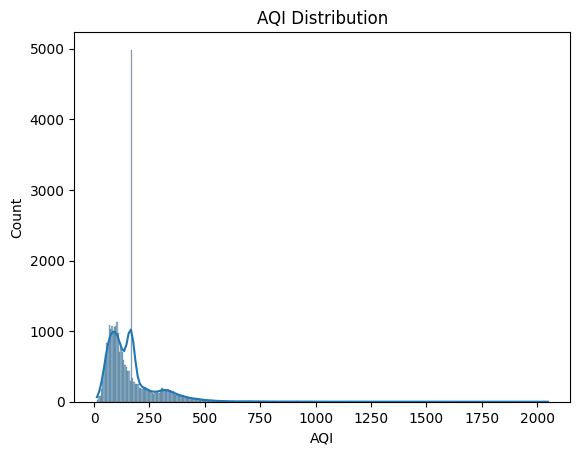

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df1['AQI'], kde=True)
plt.title("AQI Distribution")
plt.show()


In [17]:
df1[df1['AQI'] > 900].shape



(124, 16)

In [18]:
df1['AQI'].max()


np.float64(2049.0)

In [19]:
df1 = df1[df1['AQI'] <= 900]
df1.shape


(29407, 16)

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29407 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   CITY        29407 non-null  object        
 1   DATE        29407 non-null  datetime64[ns]
 2   PM2.5       29407 non-null  float64       
 3   PM10        29407 non-null  float64       
 4   NO          29407 non-null  float64       
 5   NO2         29407 non-null  float64       
 6   NOX         29407 non-null  float64       
 7   NH3         29407 non-null  float64       
 8   CO          29407 non-null  float64       
 9   SO2         29407 non-null  float64       
 10  O3          29407 non-null  float64       
 11  BENZENE     29407 non-null  float64       
 12  TOLUENE     29407 non-null  float64       
 13  XYLENE      29407 non-null  float64       
 14  AQI         29407 non-null  float64       
 15  AQI_BUCKET  29407 non-null  category      
dtypes: category(1), datetime64[

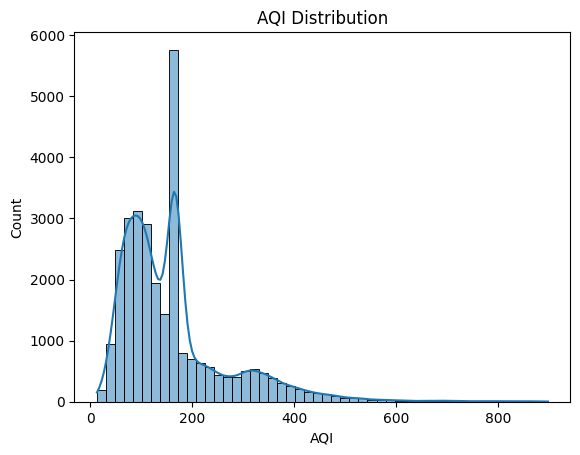

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df1['AQI'], kde=True, bins=50)
plt.title("AQI Distribution")
plt.xlabel("AQI")
plt.ylabel("Count")
plt.show()


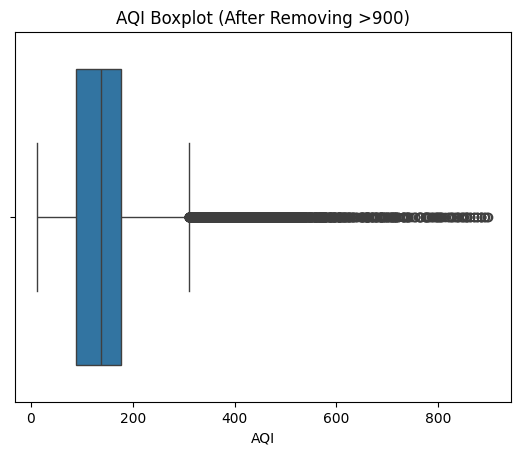

In [21]:
sns.boxplot(x=df1['AQI'])
plt.title("AQI Boxplot (After Removing >900)")
plt.show()


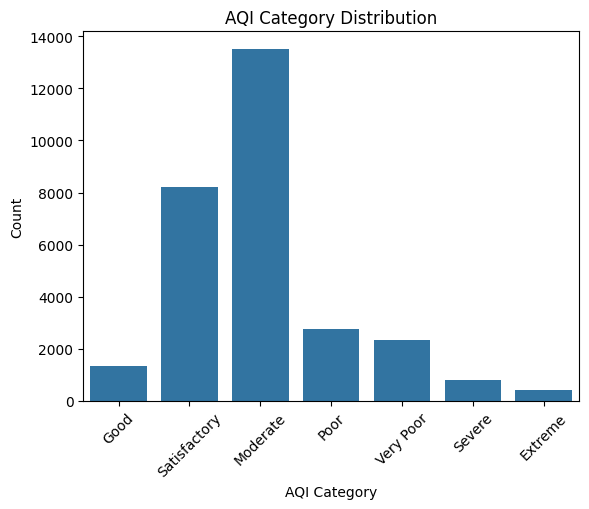

In [22]:
sns.countplot(
    x='AQI_BUCKET',
    data=df1,
    order=['Good','Satisfactory','Moderate','Poor','Very Poor','Severe','Extreme']
)
plt.xticks(rotation=45)
plt.xlabel("AQI Category")
plt.ylabel("Count")
plt.title("AQI Category Distribution")
plt.show()


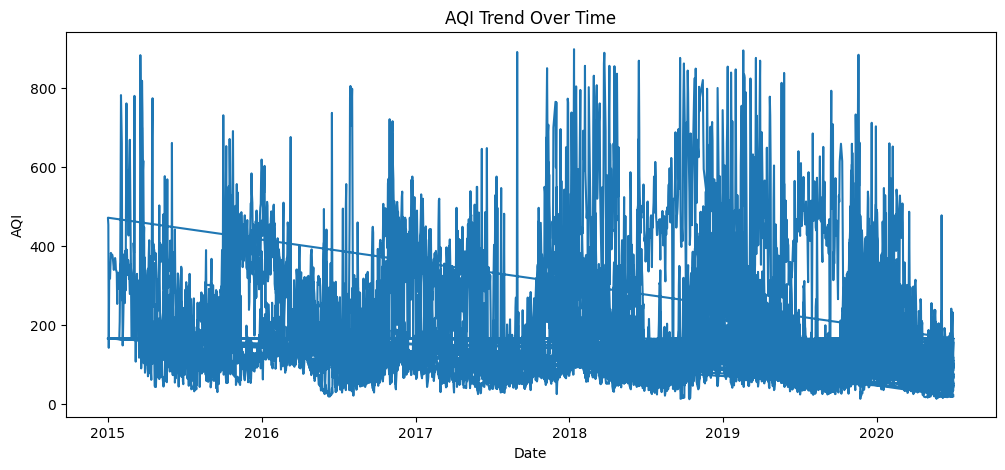

In [23]:
plt.figure(figsize=(12,5))
plt.plot(df1['DATE'], df1['AQI'])
plt.title("AQI Trend Over Time")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.show()



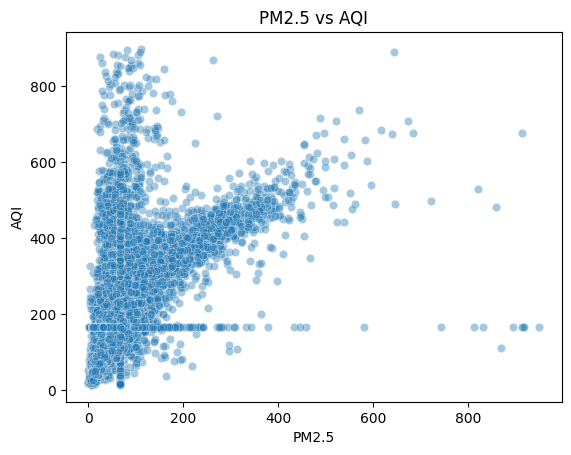

In [24]:
sns.scatterplot(x='PM2.5', y='AQI', data=df1, alpha=0.4)
plt.title("PM2.5 vs AQI")
plt.show()


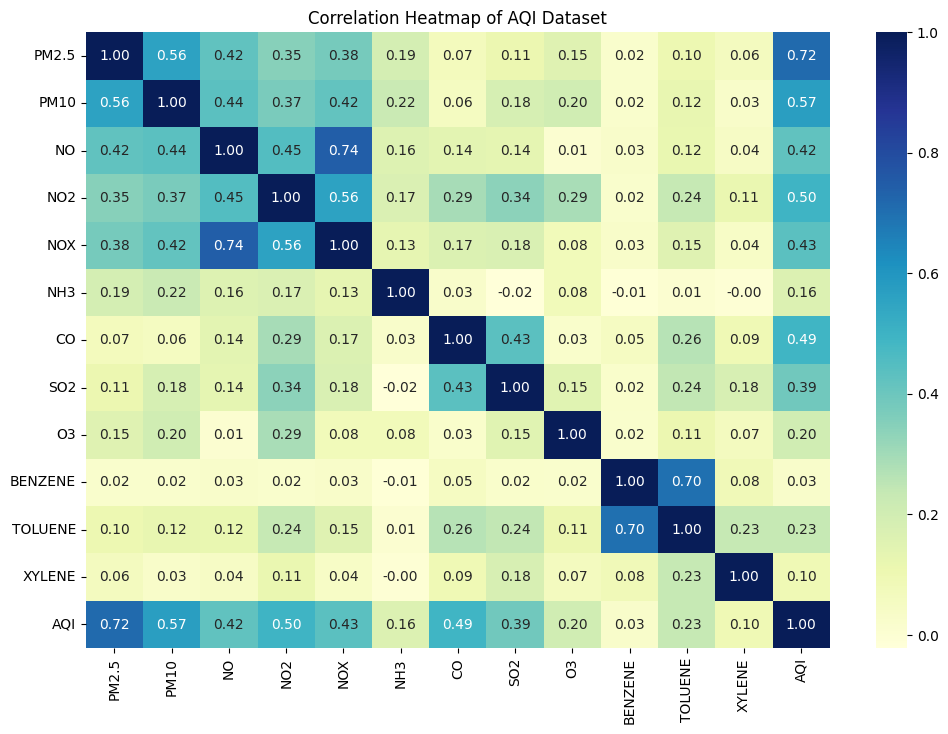

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Sirf numeric columns select karo
numeric_data = df1.select_dtypes(include='number')

# Step 2: Correlation matrix
correlation_matrix = numeric_data.corr()

# Step 3: Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu"
)
plt.title("Correlation Heatmap of AQI Dataset")
plt.show()


In [26]:
# Important features for model
feature_cols = [
    'PM2.5', 'PM10', 'NO', 'NO2', 'NOX',
    'NH3', 'CO', 'SO2', 'O3',
    'BENZENE', 'TOLUENE', 'XYLENE'
]

# New dataframe for modeling
df_model = df1[feature_cols + ['AQI']].copy()


In [27]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29407 entries, 0 to 29530
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PM2.5    29407 non-null  float64
 1   PM10     29407 non-null  float64
 2   NO       29407 non-null  float64
 3   NO2      29407 non-null  float64
 4   NOX      29407 non-null  float64
 5   NH3      29407 non-null  float64
 6   CO       29407 non-null  float64
 7   SO2      29407 non-null  float64
 8   O3       29407 non-null  float64
 9   BENZENE  29407 non-null  float64
 10  TOLUENE  29407 non-null  float64
 11  XYLENE   29407 non-null  float64
 12  AQI      29407 non-null  float64
dtypes: float64(13)
memory usage: 3.1 MB


In [28]:
X = df_model.drop('AQI', axis=1)
y = df_model['AQI']


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [33]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

xgb_reg.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [34]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_pred = xgb_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R2 Score:", r2)  # This is model accuracy 
print("MAE:", mae)
print("RMSE:", rmse)



# This model gives accuracy of around 88%


R2 Score: 0.8730288660615892
MAE: 20.4315160620089
RMSE: 38.71824301688391


In [36]:
3# Putting AQI values into buckets based on CPCB standards

def get_aqi_bucket(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Satisfactory'
    elif aqi <= 200:
        return 'Moderate'
    elif aqi <= 300:
        return 'Poor'
    elif aqi <= 400:
        return 'Very Poor'
    else:
        return 'Severe'

predicted_bucket = [get_aqi_bucket(val) for val in y_pred]





In [37]:
# Calculating confidence score for each prediction

confidence = 1 - (abs(y_pred - y_test) / y_test)
confidence = np.clip(confidence, 0, 1)

confidence_percent = confidence * 100


In [38]:
pred_df = X_test.copy()
pred_df['Predicted_AQI'] = y_pred
pred_df['AQI_BUCKET'] = pred_df['Predicted_AQI'].apply(get_aqi_bucket)


In [39]:
import numpy as np

pred_df['Actual_AQI'] = y_test.values
pred_df['Error'] = abs(pred_df['Actual_AQI'] - pred_df['Predicted_AQI'])

max_error = pred_df['Error'].max()

pred_df['Confidence_%'] = 100 * (1 - pred_df['Error'] / max_error)
pred_df['Confidence_%'] = pred_df['Confidence_%'].clip(0, 100)


In [40]:
pred_df.head()

,PM2.5,PM10,NO,NO2,NOX,NH3,CO,SO2,O3,BENZENE,TOLUENE,XYLENE,Predicted_AQI,AQI_BUCKET,Actual_AQI,Error,Confidence_%
6442,37.80,97.230000,4.00,33.21,21.01,15.010000,0.78,8.08,60.49,3.28084,8.700972,3.070128,108.110886,Moderate,94.0,14.110886,97.153420
19136,22.03,36.750000,9.06,32.64,41.70,3.330000,0.70,1.38,15.98,1.42000,9.260000,3.070128,60.958038,Satisfactory,38.0,22.958038,95.368689
24372,112.00,118.127103,9.56,21.45,31.01,23.483476,1.22,5.60,25.57,0.14000,0.380000,0.150000,245.612259,Poor,276.0,30.387741,93.869900
13334,141.54,118.127103,11.13,23.53,26.97,23.483476,1.06,1.46,38.30,0.11000,8.700972,3.070128,286.776306,Poor,329.0,42.223694,91.482241
9658,38.74,46.370000,5.03,14.20,18.99,56.890000,0.57,10.60,35.08,0.24000,0.000000,3.070128,75.276955,Satisfactory,83.0,7.723045,98.442035


In [41]:
manual_input = {
    'PM2.5': 180,
    'PM10': 220,
    'NO': 40,
    'NO2': 60,
    'NOX': 90,
    'NH3': 35,
    'CO': 1.2,
    'SO2': 18,
    'O3': 30,
    'BENZENE': 6,
    'TOLUENE': 12,
    'XYLENE': 4
}


input_df = pd.DataFrame([manual_input])


In [42]:
predicted_aqi = xgb_reg.predict(input_df)[0]
aqi_bucket = get_aqi_bucket(predicted_aqi)

print("Predicted AQI:", round(predicted_aqi, 2))
print("AQI Category:", aqi_bucket)


Predicted AQI: 339.09
AQI Category: Very Poor


## Eureka Eureka!! Humne Kiya , Humne Kiya

## I used XGBoost regression to predict AQI, evaluated it using R² score, and then derived AQI categories using CPCB standards along with a confidence score.

 




In [ ]:
"""
This is the workflow I followed for building the AQI prediction model:

EDA
 ↓
Cleaning
 ↓
Feature Selection
 ↓
Train-Test Split
 ↓
XGBoost Regression
 ↓
Evaluation (R2, MAE, RMSE)
 ↓
Rule-based AQI Bucket
 ↓
Confidence Score
 ↓
Manual Testing

"""
